# ETL Process
---
 In this part, it will 
 * read data inside 'fall2024data/'
 * convert data into one dataframe
 * change the name of features
 * drop rows which containing Nan or Inf value
 * save plot of features to 'Featrues_plot/'
 * save Analystic data to 'Analysis/'
 * save processed data to csv in 'Datasets/'

    'Dataset.csv'           - whole dataset of traffic\
    'BENIGN.csv'            - set of data labeled 'BENIGN'\
    'DoS_GoldenEye.csv'     - set ofdata labeled 'DoS_GoldenEye'\
    'DoS_Hulk.csv'          - set of data labeled 'DoS_Hulk'\
    'DoS_Slowhttptest.csv'  - set of data labeled 'DoS_Slowttptest'
    
 ...

## Extraction
---
This part will load data from the folder and concatenate them into one DataFrame


In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import glob
import time
from functools import wraps

In [2]:
def logged(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        start_time_formatted = time.strftime('%H:%M:%S', time.localtime(start_time))
        print(f"[{start_time_formatted}] Function '{func.__name__}' start.")
        
        result = func(*args, **kwargs)
        
        end_time = time.time()
        end_time_formatted = time.strftime('%H:%M:%S', time.localtime(end_time))
        execution_time = end_time - start_time
        print(f"[{end_time_formatted}] Function End, Time Elapsed: {execution_time:.4f}Sec")
        
        return result
    return wrapper

In [3]:
@logged
def get_Dset(fpath:str)->pd.DataFrame:
    _ids = list()
    try:
        # get csv files
        for csvfile in glob.glob(f'{fpath}/*.csv'):
            print('{:30s}'.format(csvfile), 'found')
            _ids.append(pd.read_csv(csvfile, sep=','))

        # get json files
        for jsonfile in glob.glob(f'{fpath}/*.json'):
            print('{:30s}'.format(jsonfile), 'found')
            _ids.append(pd.read_json(jsonfile, lines=True))

        # get parquet files
        for pqfile in glob.glob(f'{fpath}/*.parquet'):
            buff = pq.read_table(pqfile)
            print('{:30s}'.format(pqfile), 'found')
            _ids.append(buff.to_pandas())

        return pd.concat(_ids, ignore_index=True)
    
    except Exception as e:
        print('Exception:', e)
        return
    
    

In [4]:
ids = get_Dset('fall2024data')

[15:23:26] Function 'get_Dset' start.
fall2024data/ids_2.csv         found
fall2024data/ids_0.csv         found
fall2024data/ids_1.csv         found
fall2024data/ids_7.json        found
fall2024data/ids_10.json       found
fall2024data/ids_9.json        found
fall2024data/ids_4.json        found
fall2024data/ids_3.json        found
fall2024data/ids_5.parquet     found
fall2024data/ids_6.parquet     found
fall2024data/ids_11.parquet    found
fall2024data/ids_8.parquet     found
[15:23:26] Function End, Time Elapsed: 0.5917Sec


In [5]:
ids.shape

(61128, 79)

## Transform
---
In this part, data will be separated by its Label and processed to show some insight
* Data types conversion
* Data format conversion (cm to inches, etc.)
* Identifying errors in data
* Handling out-of-range and outlier data
* Add any other transformations you find necessary.

Also, Drop Label 'Heartbleed'


In [6]:
@logged
def drop_Heartbleed(data:pd.DataFrame):
    # Drop Label 'Heartbleed'
    Hbd = (data.iloc[:,-1] == 'Heartbleed')
    H_idx = Hbd[Hbd == True].index
    print(H_idx.shape[0], 'items dropped')
    df = data.drop(H_idx)
    return df

df = drop_Heartbleed(ids)


[15:23:28] Function 'drop_Heartbleed' start.
11 items dropped
[15:23:28] Function End, Time Elapsed: 0.0322Sec


### General Info about data

In [7]:
# 61117 samples with 78 features and 1 label
print(df.shape)

(61117, 79)


In [8]:
#All of features are in numerical type, thus, we don't need to transform it.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61117 entries, 0 to 61127
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             61117 non-null  int64  
 1    Flow Duration                61117 non-null  int64  
 2    Total Fwd Packets            61117 non-null  int64  
 3    Total Backward Packets       61117 non-null  int64  
 4   Total Length of Fwd Packets   61117 non-null  int64  
 5    Total Length of Bwd Packets  61117 non-null  int64  
 6    Fwd Packet Length Max        61117 non-null  int64  
 7    Fwd Packet Length Min        61117 non-null  int64  
 8    Fwd Packet Length Mean       61117 non-null  float64
 9    Fwd Packet Length Std        61117 non-null  float64
 10  Bwd Packet Length Max         61117 non-null  int64  
 11   Bwd Packet Length Min        61117 non-null  int64  
 12   Bwd Packet Length Mean       61117 non-null  float64
 13   Bwd P

In [9]:
print(pd.unique(df.iloc[:,-1]))

['BENIGN' 'DoS Hulk' 'DoS Slowhttptest' 'DoS GoldenEye']


### Change the name of the features

In [10]:
@logged
def strip_cols(df:pd.DataFrame)->pd.DataFrame:
    # Some of features have confusing spaces in their name
    cols = df.columns.to_list()
    
    for i in range(len(cols)):
        print('{:30} ->'.format(cols[i]), end= ' ')
        cols[i] = cols[i].strip()
        print('{:30}'.format(cols[i]))
        
    return df.set_axis(cols, axis=1)
        

In [11]:
df_stripped = strip_cols(df)

[15:23:33] Function 'strip_cols' start.
 Destination Port              -> Destination Port              
 Flow Duration                 -> Flow Duration                 
 Total Fwd Packets             -> Total Fwd Packets             
 Total Backward Packets        -> Total Backward Packets        
Total Length of Fwd Packets    -> Total Length of Fwd Packets   
 Total Length of Bwd Packets   -> Total Length of Bwd Packets   
 Fwd Packet Length Max         -> Fwd Packet Length Max         
 Fwd Packet Length Min         -> Fwd Packet Length Min         
 Fwd Packet Length Mean        -> Fwd Packet Length Mean        
 Fwd Packet Length Std         -> Fwd Packet Length Std         
Bwd Packet Length Max          -> Bwd Packet Length Max         
 Bwd Packet Length Min         -> Bwd Packet Length Min         
 Bwd Packet Length Mean        -> Bwd Packet Length Mean        
 Bwd Packet Length Std         -> Bwd Packet Length Std         
Flow Bytes/s                   -> Flow Bytes/s    

In [12]:
df_stripped.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

### Drop rows which contains Nan or Inf value

In [13]:
@logged
def drop_anomaly(df:pd.DataFrame)->pd.DataFrame:
    # Convert Inf value into Nan
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Columns containing NaN value
    print(df.isna().sum().sum(), 'items dropped')
    
    # 'DoS Hulk' and 'BENIGN' contains Nan or Inf value
    print(np.unique(df.loc[(ids.count(axis=1) < df.shape[1]), :].to_numpy()[:,-1], return_counts=True))
    return df.dropna()


In [14]:
df_dropped = drop_anomaly(df_stripped)

[15:23:37] Function 'drop_anomaly' start.
232 items dropped
(array(['DoS Hulk'], dtype=object), array([114]))
[15:23:37] Function End, Time Elapsed: 0.0598Sec


In [15]:
df_dropped.isna().sum().sum()

0

In [16]:
df_dropped.shape

(61001, 79)

In [17]:
BENIGN = df_dropped.loc[df_dropped['Label'] == 'BENIGN']
DoS_GoldenEye = df_dropped.loc[df_dropped['Label'] == 'DoS GoldenEye']
DoS_Hulk = df_dropped.loc[df_dropped['Label'] == 'DoS Hulk']
DoS_Slowhttptest = df_dropped.loc[df_dropped['Label'] == 'DoS Slowhttptest']

### Plotting each features
Just so watch distribution

In [18]:
import matplotlib.pyplot as plt

@logged
def show_fig(target:list):
    for j in range(len(BENIGN.columns)-1):
        fig, ax = plt.subplots(len(target), 1, constrained_layout=True)
        fig.set_dpi(600)
    
        target_col = j
        fig.suptitle(BENIGN.columns[target_col])
    
        for i in range(len(target)):
            
            ax[i].set_title(target[i].iloc[0,-1])
            ax[i].scatter(range(target[i].shape[0]), 
                          target[i].iloc[:,target_col].to_numpy(),
                          marker='x', 
                          s=[5 for _ in range(target[i].shape[0])])
        
        fig.savefig(f"Features_plot/{j}_{BENIGN.columns[j].replace('/', '')}.jpeg", dpi=600)
        plt.close(fig)
        print(f"Features_plot/{j}_{BENIGN.columns[j].replace('/', '')}.jpeg")

In [19]:
show_fig([BENIGN, DoS_GoldenEye, DoS_Hulk, DoS_Slowhttptest])

[15:23:42] Function 'show_fig' start.
Features_plot/0_Destination Port.jpeg
Features_plot/1_Flow Duration.jpeg
Features_plot/2_Total Fwd Packets.jpeg
Features_plot/3_Total Backward Packets.jpeg
Features_plot/4_Total Length of Fwd Packets.jpeg
Features_plot/5_Total Length of Bwd Packets.jpeg
Features_plot/6_Fwd Packet Length Max.jpeg
Features_plot/7_Fwd Packet Length Min.jpeg
Features_plot/8_Fwd Packet Length Mean.jpeg
Features_plot/9_Fwd Packet Length Std.jpeg
Features_plot/10_Bwd Packet Length Max.jpeg
Features_plot/11_Bwd Packet Length Min.jpeg
Features_plot/12_Bwd Packet Length Mean.jpeg
Features_plot/13_Bwd Packet Length Std.jpeg
Features_plot/14_Flow Bytess.jpeg
Features_plot/15_Flow Packetss.jpeg
Features_plot/16_Flow IAT Mean.jpeg
Features_plot/17_Flow IAT Std.jpeg
Features_plot/18_Flow IAT Max.jpeg
Features_plot/19_Flow IAT Min.jpeg
Features_plot/20_Fwd IAT Total.jpeg
Features_plot/21_Fwd IAT Mean.jpeg
Features_plot/22_Fwd IAT Std.jpeg
Features_plot/23_Fwd IAT Max.jpeg
Features

In [20]:
df_dropped.describe().to_csv('Analysis/ids_describe.csv')

In [21]:
DoS_GoldenEye.describe().to_csv('Analysis/GoldenEye_describe.csv')
DoS_Hulk.describe().to_csv('Analysis/Hulk_describe.csv')
DoS_Slowhttptest.describe().to_csv('Analysis/Slowhttptest_describe.csv')

## Load
---


In [22]:
DoS_Slowhttptest.to_csv('Datasets/DoS_Slowhttptest.csv')
DoS_Hulk.to_csv('Datasets/DoS_Hulk.csv')
DoS_GoldenEye.to_csv('Datasets/DoS_GoldenEye.csv')

In [23]:
df_dropped.to_csv('Datasets/Dataset.csv')

# Model Part
---
In this part, It will
* Read data from .csv file
* Exploratory Data Analysis
* Data Preprocessing
* Feature Engineering
* Model Selecting


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 6. Read Data
---

In [27]:
# Reading the dataset
file_path = 'Datasets/Dataset.csv'
data = pd.read_csv(file_path, index_col=0)

## 7. Exploratory Data Analysis (EDA)
---

### 1. Identify the shape of the dataset

In [28]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (61001, 79)


### 2. Unify the columns/features names

In [29]:
data.columns = [col.strip() for col in data.columns]
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

### 3. Unique values in the class label

In [30]:
print("Unique class labels:", data['Label'].unique())

Unique class labels: ['BENIGN' 'DoS Hulk' 'DoS Slowhttptest' 'DoS GoldenEye']


### 4. Checking for missing data


In [31]:
missing_data = data.isnull().sum()
print("Missing data per column:", missing_data[missing_data > 0])

Missing data per column: Series([], dtype: int64)


### 5. Columns with highly missing data

In [32]:
threshold = 0.5  # 50% threshold
high_missing = missing_data[missing_data / data.shape[0] > threshold]
print("Columns with >50% missing data:", high_missing)

Columns with >50% missing data: Series([], dtype: int64)


### 6. Univariate Analysis: Statistics and Boxplots


In [33]:
import seaborn as sns

In [34]:
# Statisctics
print(data.describe())

       Destination Port  Flow Duration  Total Fwd Packets  \
count      61001.000000   6.100100e+04       61001.000000   
mean         801.517992   4.188403e+07           5.623285   
std         5952.623437   4.265199e+07           7.525560   
min            0.000000   1.000000e+00           1.000000   
25%           80.000000   1.774720e+05           2.000000   
50%           80.000000   1.196874e+07           6.000000   
75%           80.000000   8.577636e+07           8.000000   
max        62011.000000   1.199989e+08        1235.000000   

       Total Backward Packets  Total Length of Fwd Packets  \
count            61001.000000                 61001.000000   
mean                 3.924018                   387.264930   
std                 10.668348                  1672.100008   
min                  0.000000                     0.000000   
25%                  0.000000                     0.000000   
50%                  5.000000                   337.000000   
75%             

In [35]:
# Verifying the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61001 entries, 0 to 61127
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             61001 non-null  int64  
 1   Flow Duration                61001 non-null  int64  
 2   Total Fwd Packets            61001 non-null  int64  
 3   Total Backward Packets       61001 non-null  int64  
 4   Total Length of Fwd Packets  61001 non-null  int64  
 5   Total Length of Bwd Packets  61001 non-null  int64  
 6   Fwd Packet Length Max        61001 non-null  int64  
 7   Fwd Packet Length Min        61001 non-null  int64  
 8   Fwd Packet Length Mean       61001 non-null  float64
 9   Fwd Packet Length Std        61001 non-null  float64
 10  Bwd Packet Length Max        61001 non-null  int64  
 11  Bwd Packet Length Min        61001 non-null  int64  
 12  Bwd Packet Length Mean       61001 non-null  float64
 13  Bwd Packet Length Std

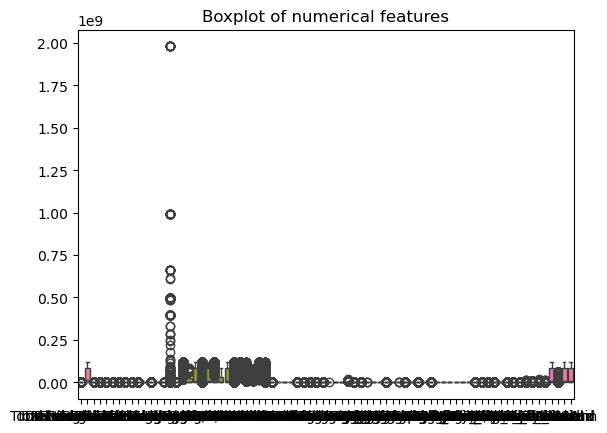

In [36]:
# Boxplot for first numerical feature
sns.boxplot(data=data.iloc[:, :-1])
plt.title("Boxplot of numerical features")
plt.show()

### 7. Bivariate Analysis: Correlation Matrix


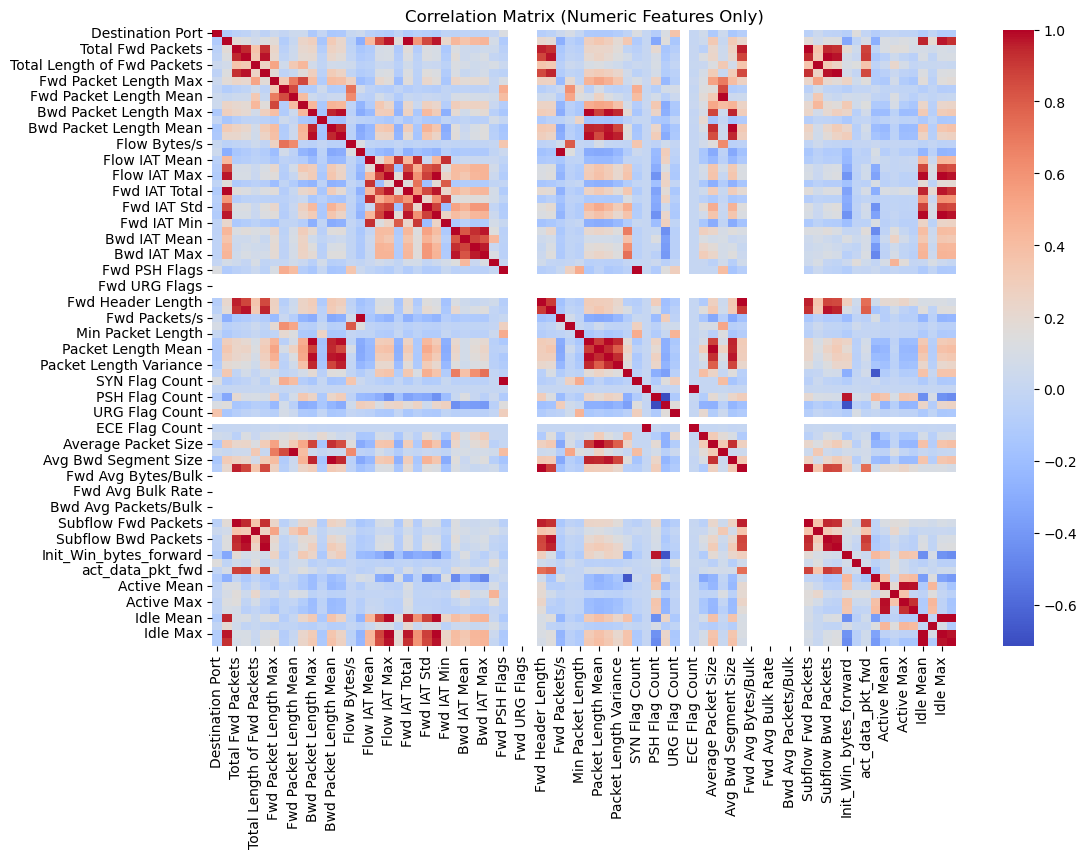

In [37]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

In [38]:
# Sort correlation matrix
@logged
def corr_sort(corr_matrix:pd.DataFrame, get_val=True)->pd.DataFrame:
    """sort correlation matrix 

    Args:
        corr_matrix (pd.DataFrame): square correlation matrix

    Returns:
        corr_sorted(pd.DataFrame): sorted, unpacked correlation matrix
    """
    
    # Convert correlation matrix to long-form DataFrame
    unpacked = corr_matrix.unstack().reset_index()
    unpacked.columns = ['Feature_1', 'Feature_2', 'Corr']
    
    # Remove self-correlations
    unpacked = unpacked[unpacked['Feature_1'] != unpacked['Feature_2']]
    
    # Drop duplicate pairs (e.g., A-B and B-A are the same)
    unpacked['Pair'] = unpacked.apply(lambda row: frozenset([row['Feature_1'], row['Feature_2']]), axis=1)
    unpacked = unpacked.drop_duplicates(subset='Pair')
    unpacked.drop(columns=['Pair'], inplace=True)
    
    # Sort by absolute correlation values in descending order
    unpacked['Abs_Corr'] = unpacked['Corr'].abs()
    corr_sorted = unpacked.sort_values(by='Abs_Corr', ascending=False)
    
    # Drop helper column
    corr_sorted.drop(columns=['Abs_Corr'], inplace=True)
    corr_sorted.reset_index(drop=True, inplace=True)
    
    print(corr_sorted.head(10))
    
    if(get_val):
        return corr_sorted
    else:
        return corr_sorted[['Feature_1', 'Feature_2']]

In [39]:
# get top 10 correlated features
top = corr_sort(corr_matrix, get_val=False)
top_10_corr_features = top.head(10).to_numpy().flatten()
top_10_corr_features

[15:24:57] Function 'corr_sort' start.
                     Feature_1             Feature_2      Corr
0       Bwd Packet Length Mean  Avg Bwd Segment Size  1.000000
1  Total Length of Fwd Packets     Subflow Fwd Bytes  1.000000
2            Total Fwd Packets   Subflow Fwd Packets  1.000000
3       Total Backward Packets   Subflow Bwd Packets  1.000000
4                Fwd PSH Flags        SYN Flag Count  1.000000
5       Fwd Packet Length Mean  Avg Fwd Segment Size  1.000000
6            Fwd Header Length   Fwd Header Length.1  1.000000
7               RST Flag Count        ECE Flag Count  1.000000
8  Total Length of Bwd Packets     Subflow Bwd Bytes  1.000000
9                 Flow IAT Max           Fwd IAT Max  0.999769
[15:24:57] Function End, Time Elapsed: 0.0379Sec


array(['Bwd Packet Length Mean', 'Avg Bwd Segment Size',
       'Total Length of Fwd Packets', 'Subflow Fwd Bytes',
       'Total Fwd Packets', 'Subflow Fwd Packets',
       'Total Backward Packets', 'Subflow Bwd Packets', 'Fwd PSH Flags',
       'SYN Flag Count', 'Fwd Packet Length Mean', 'Avg Fwd Segment Size',
       'Fwd Header Length', 'Fwd Header Length.1', 'RST Flag Count',
       'ECE Flag Count', 'Total Length of Bwd Packets',
       'Subflow Bwd Bytes', 'Flow IAT Max', 'Fwd IAT Max'], dtype=object)

### 8. Multivariate Analysis: Clustering with HDBSCAN


In [40]:
from sklearn.cluster import HDBSCAN

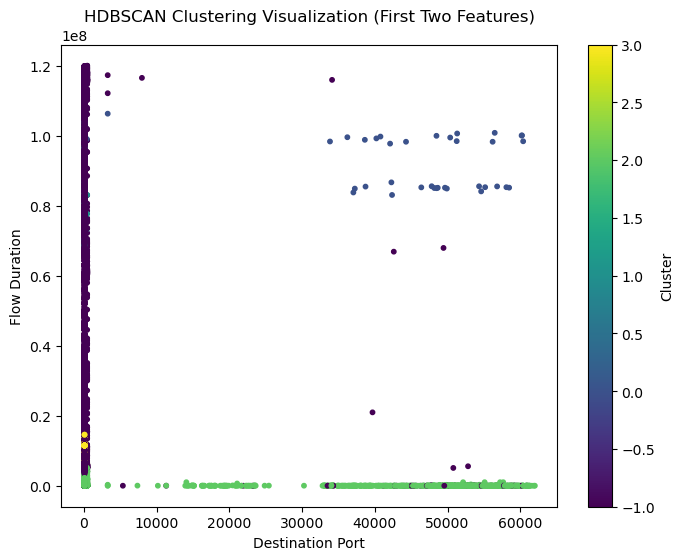

Unique clusters identified by DBSCAN: {0, 1, 2, 3, -1}
Number of outliers (label = -1): 17070


In [41]:
# Convert to numpy array for DBSCAN
features = numeric_data.to_numpy()

# Apply DBSCAN clustering
hdbscan = HDBSCAN(min_samples=5000, store_centers='centroid', n_jobs=-1)
cluster_res = hdbscan.fit_predict(features)

# Visualize the clusters (using the first two numeric features)
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=cluster_res, cmap='viridis', s=10)
plt.title("HDBSCAN Clustering Visualization (First Two Features)")
plt.xlabel(numeric_data.columns[0])
plt.ylabel(numeric_data.columns[1])
plt.colorbar(label="Cluster")
plt.show()

# Analyze DBSCAN results
unique_clusters = set(cluster_res)
print("Unique clusters identified by DBSCAN:", unique_clusters)
print("Number of outliers (label = -1):", list(cluster_res).count(-1))

In [42]:
# compare cluster with actual label
comparison_table = pd.crosstab(cluster_res, data['Label'])
print(comparison_table)

Label  BENIGN  DoS GoldenEye  DoS Hulk  DoS Slowhttptest
row_0                                                   
-1       1116          10444      1050              4460
 0         40              0      5480               279
 1          3              0     11837                 0
 2       3838            400     11546               760
 3          6           9742         0                 0


In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

Accuracy: 0.42123899608203147


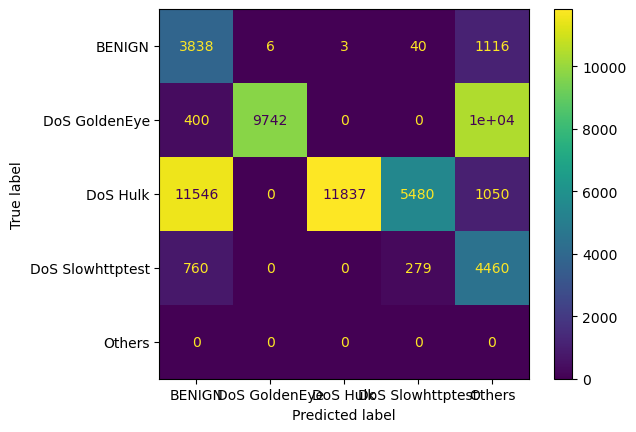

In [44]:
# map cluster with label * manually *
cluster_to_label_map = {-1: 'Others',0: 'DoS Slowhttptest', 1: 'DoS Hulk', 2: 'BENIGN', 3: 'DoS GoldenEye'}  # 예시 매핑
mapped_clusters = [cluster_to_label_map[c] for c in cluster_res]

# Score accuracy
accuracy = accuracy_score(data['Label'], mapped_clusters) 
print("Accuracy:", accuracy)

# Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(data['Label'], mapped_clusters)

In [45]:
# result is positive,
# HDBSCAN found some structures among features
from sklearn.metrics import silhouette_score
print('Silhouette Score:', silhouette_score(data.iloc[:,:-1], cluster_res))

Silhouette Score: 0.47035323952979985


In [46]:
# Some insights
print("Cluster Labels:", cluster_res)
print("Probability of Membership:", hdbscan.probabilities_)
print("Centroids:", hdbscan.centroids_)
# This information can be used to determine correlations between labels and features.

Cluster Labels: [2 2 2 ... 3 3 3]
Probability of Membership: [0.03244724 0.97597351 0.97431332 ... 0.9091894  0.59701696 0.69323641]
Centroids: [[3.68097607e+02 9.40079333e+07 5.92657584e+00 6.77837661e+00
  4.96496773e+02 1.11847202e+04 3.84547432e+02 2.45103699e-02
  8.10499356e+01 1.62554604e+02 5.77369346e+03 4.78478364e-02
  1.64118247e+03 2.29243484e+03 1.25461647e+02 1.36105543e-01
  8.16847346e+06 2.75441664e+07 9.36678072e+07 1.05393350e+01
  9.39192895e+07 1.96907984e+07 4.27118165e+07 9.36684882e+07
  7.25434869e+02 9.39130617e+07 1.72008216e+07 3.97401535e+07
  9.37671303e+07 3.54594040e+03 4.95849706e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.67992828e+02 2.24698757e+02
  6.34143819e-02 7.26911610e-02 2.45103699e-02 5.82139596e+03
  8.52061282e+02 1.76751092e+03 3.37237687e+06 9.64029430e-01
  4.95849706e-04 0.00000000e+00 2.92415718e-02 6.11172727e-03
  8.15877222e-04 0.00000000e+00 0.00000000e+00 8.77729433e-01
  9.19662881e+02 8.10499356e+01 1.64118247e+03 1.6

### 9. Outlier Detection

In [47]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

# Display results
print("Number of outliers per column:")
print(outliers)

print("Total outliers:", outliers.sum(), 'among', numeric_data.shape[0])

Number of outliers per column:
Destination Port                4451
Flow Duration                      0
Total Fwd Packets                535
Total Backward Packets           373
Total Length of Fwd Packets     3225
                               ...  
Active Min                     12997
Idle Mean                          0
Idle Std                        4098
Idle Max                           0
Idle Min                           0
Length: 78, dtype: int64
Total outliers: 217639 among 61001


# IQR Calculation
---
The interquartile range (IQR) is calculated based on numeric columns only:

IQR = 𝑄3−𝑄1

IQR = 𝑄3−𝑄1

Outliers are values outside:

Lower Bound = 𝑄1−1.5×IQR

Upper Bound = 𝑄3+1.5×IQR


# Justifications
---
EDA Techniques: These methods provide a comprehensive overview of the dataset.

For example, correlation matrices help identify relationships between features, while boxplots reveal outliers.

Tools: Seaborn is ideal for creating advanced visualizations with minimal code,

We used HDBSCAN from Scikit-learn for clustering since our dataset is not scaled

also Scikit-learn is a reliable library for clustering and machine learning tasks.

# Machine Learning Pipeline

## 8 Data Preprocessing
---


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### 1. Duplicate Removal


In [112]:
data = data.drop_duplicates()

### 2. Splitting Dataset and Unify Dtype


In [113]:
X = data.select_dtypes(include=[np.number]).astype(np.float64)  # Select Numeric features and unify datatypes
                                                                # Ensure 'Label' or any categorical columns are excluded from features
y = data['Label']  # Target variable (categorical)

### 3. Encoding Categorical Data

In [114]:
label_encoder = LabelEncoder()
print(pd.unique(y))
y = label_encoder.fit_transform(y)
print(pd.unique(y))

['BENIGN' 'DoS Hulk' 'DoS Slowhttptest' 'DoS GoldenEye']
[0 2 3 1]


### 4. Train, Validation, and Test Split

In [115]:
# Train set split (70%)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

# Validation, Test set split (15% each)
X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42, stratify=y_rest)

### 5. Handling Missing Data


In [116]:
# Compute the mean from the training data only
train_mean = X_train.mean()

# Fill missing values using the training data mean
X_train.fillna(train_mean, inplace=True)
X_valid.fillna(train_mean, inplace=True)
X_test.fillna(train_mean, inplace=True)
print('Missing in X_train:', X_train.isnull().sum().sum())
print('Missing in X_valid:', X_valid.isnull().sum().sum())
print('Missing in X_test:', X_test.isnull().sum().sum())

Missing in X_train: 0
Missing in X_valid: 0
Missing in X_test: 0


### 6. Verify the processed data


In [117]:
print("X_train shape:", X_train.shape)
print("X_train shape:", X_valid.shape)
print("X_test shape:", X_test.shape)
print("y_train unique labels:", label_encoder.classes_)

X_train shape: (31765, 78)
X_train shape: (6807, 78)
X_test shape: (6807, 78)
y_train unique labels: ['BENIGN' 'DoS GoldenEye' 'DoS Hulk' 'DoS Slowhttptest']


8.2 Justifications
---
Preprocessing Choices

* Duplicate Removal:
 Ensures that redundant records do not bias the model or distort statistical properties of the dataset.
 Reduces computational overhead during training.

* Encoding Categorical Data:
 LabelEncoder is used to transform categorical target labels into numeric values required for machine learning models.
 Ensures that class labels are represented consistently without introducing unnecessary dimensions.

* Splitting the Dataset:
 A 70-30 split ensures sufficient data for both training and testing while balancing computational feasibility.
 This is a standard practice for general model validation.

* Handling Missing Data:
 Filling missing values with the mean is computationally efficient and maintains the dataset's distribution for numeric features.
 Ensures that no test statistics are leaked during preprocessing, as means are calculated separately for training and testing sets.

* Technology Choices:
 Pandas: For efficient preprocessing operations like deduplication and handling missing values.
 Scikit-learn: For splitting datasets and encoding categorical variables, ensuring compatibility with downstream modeling.

## 9. Feature Engineering
---

In a Nutshell

* X_train, X_valid, X_test: Splited datasets
* X__scaled: Standardized datasets
* X__reduced_var: Datasets of selected features, standardized
* X__reduced_RF_imp: 
* X__uncorrelated:
* X__lasso:
* X__train_pca:
* X__lda:


In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [480]:
@logged
def train_RF(n_estimators=200, xtrain=X_train, 
             ytrain=y_train, xtest=X_test, ytest=y_test)->RandomForestClassifier:
    
    """train RandomForest Classifier and show metrics
    I chose recall score since I think the less False Positive the better.

    Args:
        n_estimators (int, optional): Defaults to 100.
        xtrain (_type_, optional): Defaults to X_train.
        ytrain (_type_, optional): Defaults to y_train.

    Returns:
        RandomForestClassifier: trained model
    """
    # Training
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(xtrain, ytrain)
    
    # Predicting
    res = rf_model.predict(xtest)
    print(res)
    
    # Scoring
    y_re = np.where(ytest >= 1, 1, ytest)
    res = np.where(res >= 1, 1, res)
    
    # Plotting
    ConfusionMatrixDisplay.from_predictions(y_re, res)
    
    print('Accuracy:', accuracy_score(y_re, res))
    print('Recall:', recall_score(y_re, res))
    
    return rf_model

[14:36:53] Function 'train_RF' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.999559277214632
Recall: 1.0
[14:36:59] Function End, Time Elapsed: 6.0522Sec


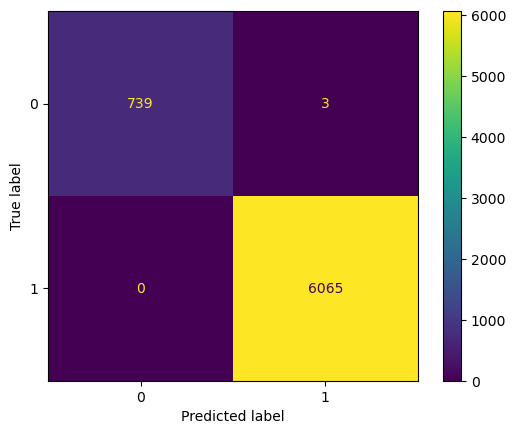

In [481]:
# Reference model without any tweak
# Fit model
rf_model = train_RF(200, X_train, y_train, X_valid, y_valid)

Feature Scaling

In [482]:
from sklearn.preprocessing import StandardScaler

In [483]:
# Standardize the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [155]:
print('Mean of X_train_scaled:', X_train_scaled.mean())
print('Mean of X_valid_scaled:', X_valid_scaled.mean())
print('Mean of X_test_scaled:', X_test_scaled.mean())
print('Std of X_train_scaled:', X_train_scaled.std())
print('Std of X_valid_scaled:', X_valid_scaled.std())
print('Std of X_test_scaled:', X_test_scaled.std())

Mean of X_train_scaled: -1.4338930038304135e-19
Mean of X_valid_scaled: 0.001501600321111685
Mean of X_test_scaled: 0.0004278583476063406
Std of X_train_scaled: 0.933699561847853
Std of X_valid_scaled: 0.9152026111040191
Std of X_test_scaled: 1.0199366967822587


Feature Selection

In [156]:
from sklearn.feature_selection import VarianceThreshold

2.1 Remove features with near-zero variance


In [157]:
# Fit VarianceThreshold on X_train only
variance_filter = VarianceThreshold(threshold=0.01)  # Features with >1% variance
X_train_reduced_var = variance_filter.fit_transform(X_train_scaled)

# Apply the same filter to X_valid and X_test
X_valid_reduced_var = variance_filter.transform(X_valid_scaled)
X_test_reduced_var = variance_filter.transform(X_test_scaled)

variance_filter.feature_names_in_ = X_train.columns
var_selected = variance_filter.get_feature_names_out()
print('Selected Features:', var_selected)

Selected Features: Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count

[15:52:25] Function 'train_RF' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.9997061848097547
Recall: 1.0
[15:52:32] Function End, Time Elapsed: 6.2929Sec


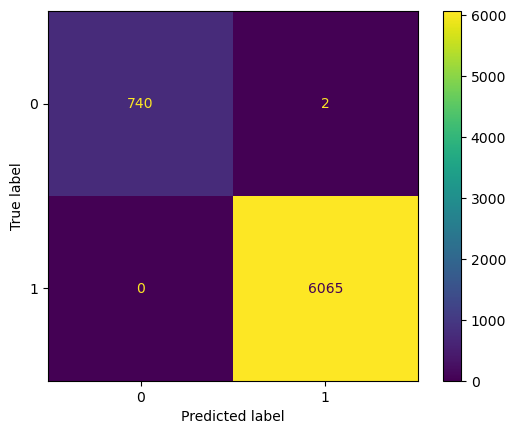

In [158]:
# Fit model
rf_model_reduced_var = train_RF(200, X_train_reduced_var, y_train, X_valid_reduced_var, y_valid)

In [159]:
# Feature importance
importances = rf_model_reduced_var.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by importance

# Select dominant 20 features
num_features = 20
sel_features = indices[:num_features]

print("Selected Features:", sel_features)

# Reduce dataset
X_train_reduced_RF_imp = X_train_reduced_var[:,sel_features]
X_valid_reduced_RF_imp = X_valid_reduced_var[:,sel_features]
X_test_reduced_RF_imp = X_test_reduced_var[:,sel_features]

print("X_train shape after filtering:", X_train_reduced_RF_imp.shape)
print("X_valid shape after filtering:", X_valid_reduced_RF_imp.shape)
print("X_test shape after filtering:", X_test_reduced_RF_imp.shape)

Selected Features: [22 56 17 18 23 20 16 21  1 67 12 15 66 50 37 13 26  0 33 27]
X_train shape after filtering: (31765, 20)
X_valid shape after filtering: (6807, 20)
X_test shape after filtering: (6807, 20)


[15:53:12] Function 'train_RF' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.9992654620243867
Recall: 0.9996702390766694
[15:53:16] Function End, Time Elapsed: 4.7247Sec


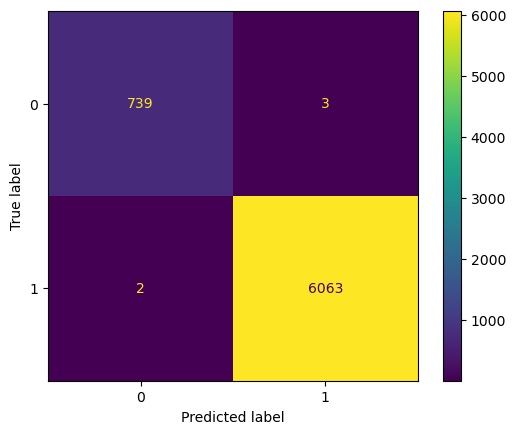

In [160]:
# Train RandomForest model
rf_model_reduced_imp = train_RF(200, X_train_reduced_RF_imp, y_train, X_valid_reduced_RF_imp, y_valid)

In [487]:
# Compute correlation matrix on X_train_reduced
correlation_matrix = np.corrcoef(X_train_reduced_var, rowvar=False)
correlated_features = set()
threshold = 0.9

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix[i, j]) > threshold:
            correlated_features.add(j)
            
print("X_train shape before filtering:", X_train_reduced_var.shape)
print("X_valid shape before filtering:", X_valid_reduced_var.shape)
print("X_test shape before filtering:", X_test_reduced_var.shape)

print(correlated_features)

X_train_uncorrelated = np.delete(X_train_reduced_var, list(correlated_features), axis=1)
X_valid_uncorrelated = np.delete(X_valid_reduced_var, list(correlated_features), axis=1)
X_test_uncorrelated = np.delete(X_test_reduced_var, list(correlated_features), axis=1)

# Final datasets
print("X_train shape after filtering:", X_train_uncorrelated.shape)
print("X_valid shape after filtering:", X_valid_uncorrelated.shape)
print("X_test shape after filtering:", X_test_uncorrelated.shape)


X_train shape before filtering: (31765, 68)
X_valid shape before filtering: (6807, 68)
X_test shape before filtering: (6807, 68)
{3, 5, 9, 12, 13, 18, 20, 21, 22, 23, 24, 27, 28, 31, 32, 33, 36, 37, 38, 39, 41, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 62, 63, 64, 66, 67}
X_train shape after filtering: (31765, 31)
X_valid shape after filtering: (6807, 31)
X_test shape after filtering: (6807, 31)


[16:12:03] Function 'train_RF' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.9994123696195093
Recall: 0.9998351195383347
[16:12:07] Function End, Time Elapsed: 4.0447Sec


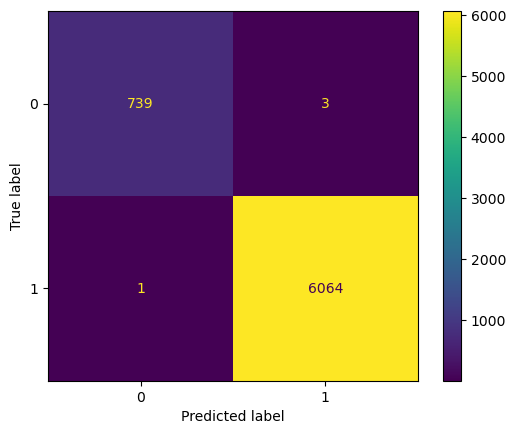

In [218]:
# Fit model with uncorrelated
rf_model_uncorrelated = train_RF(200, X_train_uncorrelated, y_train, X_valid_uncorrelated, y_valid)

In [219]:
from sklearn.linear_model import LassoCV

In [220]:
# LASSO for feature selection
lasso = LassoCV(random_state=42)
lasso.fit(X_train_uncorrelated, y_train)

# Select features with non-zero coefficients
selected_features = np.where(lasso.coef_ != 0)[0]
print(selected_features)

X_train_lasso = X_train_uncorrelated[:, selected_features]
X_valid_lasso = X_valid_uncorrelated[:, selected_features]
X_test_lasso = X_test_uncorrelated[:, selected_features]

print("X_train shape after filtering:", X_train_lasso.shape)
print("X_valid shape after filtering:", X_valid_lasso.shape)
print("X_test shape after filtering:", X_test_lasso.shape)

[ 0  1  2  3  4  5  6  7  8  9 11 12 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30]
X_train shape after filtering: (31765, 29)
X_valid shape after filtering: (6807, 29)
X_test shape after filtering: (6807, 29)


[16:12:28] Function 'train_RF' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.999559277214632
Recall: 0.9998351195383347
[16:12:31] Function End, Time Elapsed: 3.8553Sec


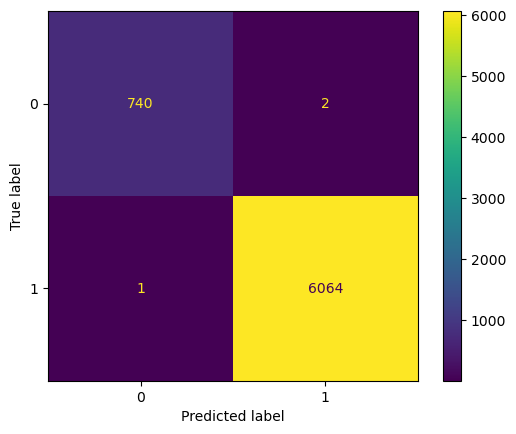

In [221]:
# Fit model with lasso
rf_model_lasso = train_RF(200, X_train_lasso, y_train, X_valid_lasso, y_valid)

Feature Extraction

In [222]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=5)  # Retain 5 principal components
X_train_pca = pca.fit_transform(X_train_lasso)
X_valid_pca = pca.transform(X_valid_lasso)
X_test_pca = pca.transform(X_train_lasso)

print("X_train shape after filtering:", X_train_pca.shape)
print("X_valid shape after filtering:", X_valid_pca.shape)
print("X_test shape after filtering:", X_test_pca.shape)

X_train shape after filtering: (31765, 5)
X_valid shape after filtering: (6807, 5)
X_test shape after filtering: (31765, 5)


[16:12:43] Function 'train_RF' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.9975025708829146
Recall: 0.9995053586150041
[16:12:50] Function End, Time Elapsed: 7.5598Sec


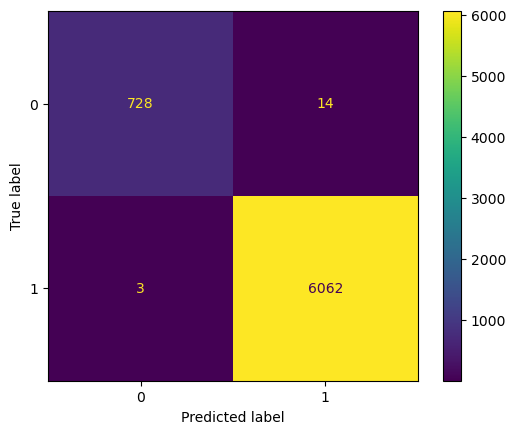

In [223]:
rf_model_pca = train_RF(200, X_train_pca, y_train, X_valid_pca, y_valid)

In [224]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA for dimensionality reduction
lda = LDA(n_components=3)  # Number of classes - 1
X_train_lda = lda.fit_transform(X_train_lasso, y_train)
X_valid_lda = lda.transform(X_valid_lasso)
X_test_lda = lda.transform(X_test_lasso)

print("X_train shape after filtering:", X_train_lda.shape)
print("X_valid shape after filtering:", X_valid_lda.shape)
print("X_test shape after filtering:", X_test_lda.shape)

X_train shape after filtering: (31765, 3)
X_valid shape after filtering: (6807, 3)
X_test shape after filtering: (6807, 3)


[16:12:55] Function 'train_RF' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.9967680329073013
Recall: 0.9995053586150041
[16:12:58] Function End, Time Elapsed: 3.7354Sec


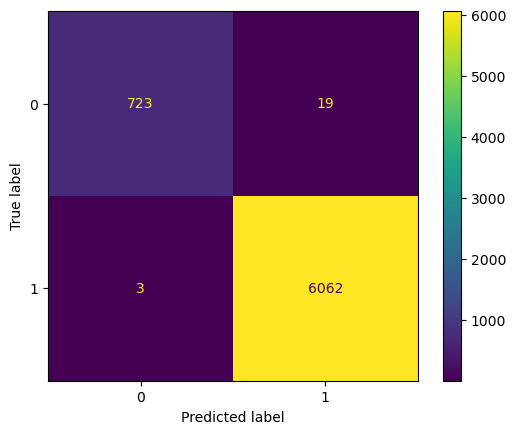

In [225]:
rf_model_lda = train_RF(200, X_train_lda, y_train, X_valid_lda, y_valid)

# Why Random Forest ?
---
* Ease of Use: Random Forest requires less hyperparameter tuning compared to XGBoost, making it quicker to implement for feature selection.
* Feature Importance: Random Forest provides clear rankings of feature importance, which is directly used for selecting the top features.
* Efficiency: It handles large datasets with many features effectively and is robust to overfitting when used for feature selection.
* Interpretability: The feature importance scores are straightforward to interpret, unlike the complexity of interpreting gradient-boosted trees.

In [226]:
from xgboost import XGBClassifier

In [227]:
@logged
def train_XG(n_estimators=200, xtrain=X_train, 
             ytrain=y_train, xtest=X_test, ytest=y_test)->XGBClassifier:
    
    """train XGBoost Classifier and show metrics
    I chose recall score since I think the less False Positive the better.

    Args:
        n_estimators (int, optional): Defaults to 100.
        xtrain (_type_, optional): Defaults to X_train.
        ytrain (_type_, optional): Defaults to y_train.

    Returns:
        XGBClassifier: trained model
    """
    # Training
    xg_model = XGBClassifier(n_estimators=n_estimators, random_state=42)
    xg_model.fit(xtrain, ytrain)
    
    # Predicting
    res = xg_model.predict(xtest)
    print(res)
    
    # Scoring
    y_re = np.where(ytest >= 1, 1, ytest)
    res = np.where(res >= 1, 1, res)
    
    # Plotting
    ConfusionMatrixDisplay.from_predictions(y_re, res)
    
    print('Accuracy:', accuracy_score(y_re, res))
    print('Recall:', recall_score(y_re, res))
    
    return xg_model

[16:13:17] Function 'train_XG' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.9998530924048773
Recall: 1.0
[16:13:18] Function End, Time Elapsed: 1.7006Sec


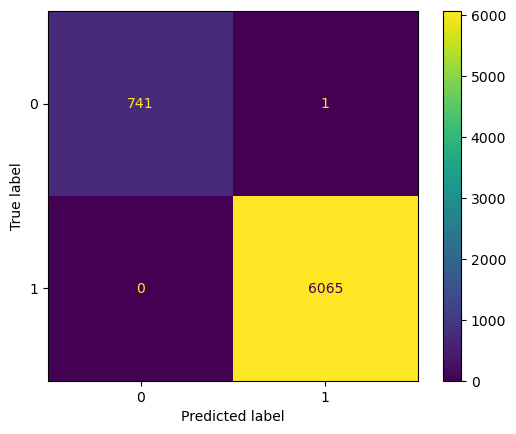

In [228]:
xg_model = train_XG(200, X_train, y_train, X_valid, y_valid)

[16:13:20] Function 'train_XG' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.9998530924048773
Recall: 1.0
[16:13:22] Function End, Time Elapsed: 1.5572Sec


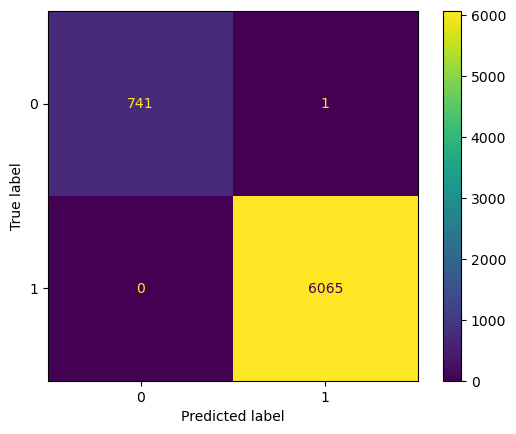

In [229]:
xg_model_reduced_var = train_XG(200, X_train_reduced_var, y_train,
                                X_valid_reduced_var, y_valid)

In [230]:
# Feature importance
importances = xg_model_reduced_var.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by importance

# Select dominant 20 features
num_features = 20
sel_features = indices[:num_features]

print("Selected Features:", sel_features)
X_train_reduced_XG_imp = X_train_reduced_var[:,sel_features]
X_valid_reduced_XG_imp = X_valid_reduced_var[:,sel_features]
X_test_reduced_XG_imp = X_test_reduced_var[:,sel_features]

print("X_train shape after filtering:", X_train_reduced_XG_imp.shape)
print("X_valid shape after filtering:", X_valid_reduced_XG_imp.shape)
print("X_test shape after filtering:", X_test_reduced_XG_imp.shape)

Selected Features: [35 22 60 30 33 27 56  0 48  7 47  3 16  8 45 57 18 21 37 12]
X_train shape after filtering: (31765, 20)
X_valid shape after filtering: (6807, 20)
X_test shape after filtering: (6807, 20)


[16:13:29] Function 'train_XG' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.9997061848097547
Recall: 1.0
[16:13:30] Function End, Time Elapsed: 0.6951Sec


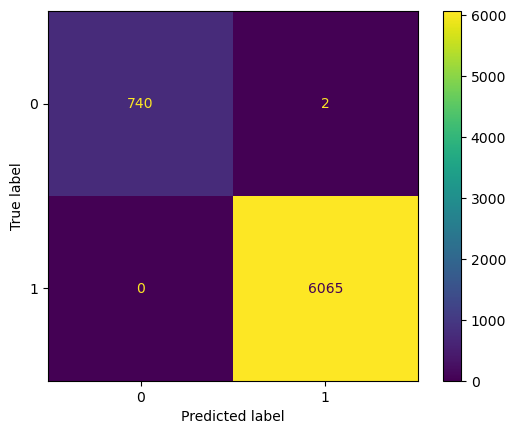

In [231]:
xg_model_reduced_imp = train_XG(200, X_train_reduced_XG_imp, y_train, X_valid_reduced_XG_imp, y_valid)

[16:13:38] Function 'train_XG' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.9994123696195093
Recall: 0.9998351195383347
[16:13:39] Function End, Time Elapsed: 1.0198Sec


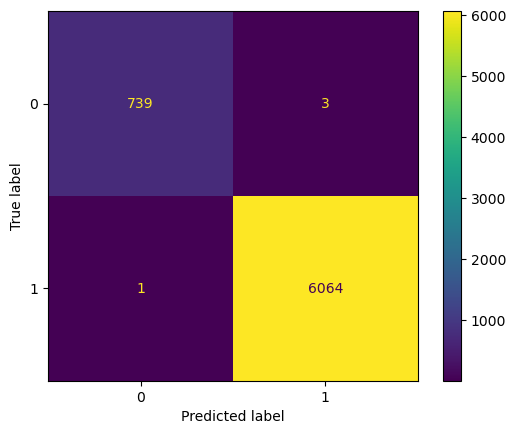

In [232]:
xg_model_uncorrelated = train_XG(200, X_train_uncorrelated, y_train, X_valid_uncorrelated, y_valid)

[16:13:45] Function 'train_XG' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.999559277214632
Recall: 1.0
[16:13:46] Function End, Time Elapsed: 0.8778Sec


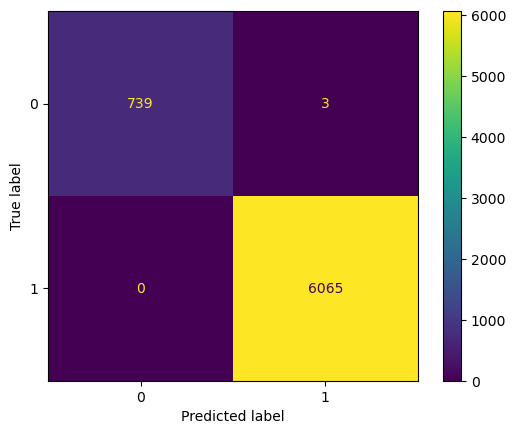

In [233]:
xg_model_lasso = train_XG(200, X_train_lasso, y_train, X_valid_lasso, y_valid)


[16:13:51] Function 'train_XG' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.996474217717056
Recall: 0.9995053586150041
[16:13:51] Function End, Time Elapsed: 0.6141Sec


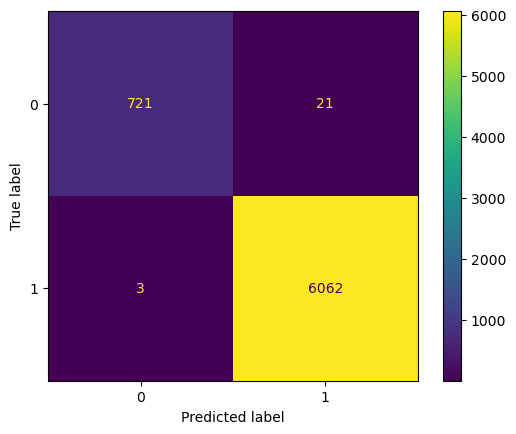

In [234]:
xg_model_pca = train_XG(200, X_train_pca, y_train, X_valid_pca, y_valid)

[16:13:55] Function 'train_XG' start.
[2 2 2 ... 1 1 2]
Accuracy: 0.9957396797414426
Recall: 0.9988458367683429
[16:13:56] Function End, Time Elapsed: 0.6102Sec


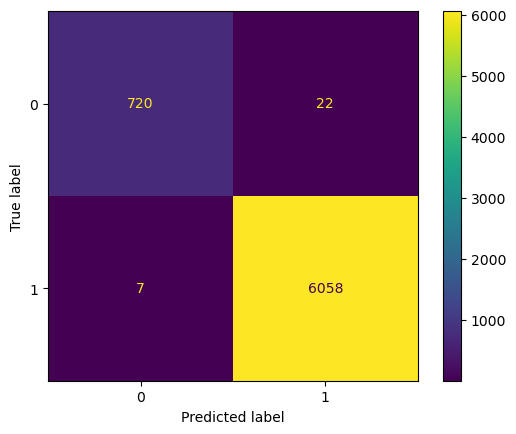

In [235]:
xg_model_lda = train_XG(200, X_train_lda, y_train, X_valid_lda, y_valid)

# Why XGBoost?
---
* High Performance: XGBoost often achieves superior accuracy due to its sophisticated boosting algorithm, making it ideal for complex datasets.
* Handles Non-Linear Features: XGBoost excels at capturing intricate relationships between features, making it suitable for datasets with non-linear dependencies.
* Feature Importance: Like Random Forest, XGBoost provides feature importance rankings but also supports advanced metrics like SHAP values for deeper interpretability.
* Efficiency with Sparse Data: XGBoost is optimized for handling missing or sparse data, making it robust in real-world scenarios.
* Customizability: It offers extensive hyperparameter tuning options, allowing for precise control over model behavior and better optimization.

In [236]:
# Final datasets after feature engineering
print("X_train_lasso shape:", X_train_lasso.shape)
print("X_test_valid shape:", X_valid_lasso.shape)
print("X_test_lasso shape:", X_test_lasso.shape)

X_train_lasso shape: (31765, 29)
X_test_valid shape: (6807, 29)
X_test_lasso shape: (6807, 29)


In [237]:
# Convert processed arrays to DataFrames
X_train_df = pd.DataFrame(X_train_lasso, columns=[f"Lasso_{i+1}" for i in range(X_train_lasso.shape[1])])
X_valid_df = pd.DataFrame(X_valid_lasso, columns=[f"Lasso_{i+1}" for i in range(X_valid_lasso.shape[1])])
X_test_df = pd.DataFrame(X_test_lasso, columns=[f"Lasso_{i+1}" for i in range(X_test_lasso.shape[1])])

# Include target variable
X_train_df['Label'] = y_train
X_valid_df['Label'] = y_valid
X_test_df['Label'] = y_test

# Save to CSV
X_train_df.to_csv("processed_X_train.csv", index=False)
X_valid_df.to_csv("processed_X_valid.csv", index=False)
X_test_df.to_csv("processed_X_test.csv", index=False)

print("Processed data saved to 'processed_X_train.csv', 'processed_X_valid.csv', and 'processed_X_test.csv'")


Processed data saved to 'processed_X_train.csv', 'processed_X_valid.csv', and 'processed_X_test.csv'


In [238]:
# Save to Parquet for more efficient storage
X_train_df.to_parquet("processed_X_train.parquet", index=False)
X_valid_df.to_parquet("processed_X_valid.parquet", index=False)
X_test_df.to_parquet("processed_X_test.parquet", index=False)

print("Processed data saved to 'processed_X_train.parquet', 'processed_X_test.parquet', and 'processed_X_test.parquet'")


Processed data saved to 'processed_X_train.parquet', 'processed_X_test.parquet', and 'processed_X_test.parquet'


# Model Selection and Training
---

In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [240]:
@logged
def mass_train(name, model, xtrain, ytrain, xtest, yvalid, results):
    print(f"Training {model}...")
    model.fit(xtrain, ytrain)       # Use lasso-transformed data or top features
    y_pred = model.predict(xtest)   # Predict on the test set
    
    y_class = np.where(yvalid >= 1, 1, yvalid)
    y_pred = np.where(y_pred >= 1, 1, y_pred)
    
    # Evaluate performance
    accuracy = accuracy_score(y_class, y_pred)
    precision = precision_score(y_class, y_pred, average="weighted")
    recall = recall_score(y_class, y_pred, average="weighted")
    f1 = f1_score(y_class, y_pred, average="weighted")
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

In [241]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(kernel="linear", random_state=42),
}

In [242]:
# Initialize a dictionary to store performance metrics
results = {}

for name, model in models.items():
    mass_train(name, model, X_train_lasso, y_train, X_valid_lasso, y_valid, results)


[16:14:28] Function 'mass_train' start.
Training LogisticRegression(max_iter=1000, random_state=42)...
Logistic Regression - Accuracy: 0.9944, Precision: 0.9944, Recall: 0.9944, F1 Score: 0.9944
[16:14:31] Function End, Time Elapsed: 2.2802Sec
[16:14:31] Function 'mass_train' start.
Training RandomForestClassifier(random_state=42)...
Random Forest - Accuracy: 0.9996, Precision: 0.9996, Recall: 0.9996, F1 Score: 0.9996
[16:14:33] Function End, Time Elapsed: 2.0113Sec
[16:14:33] Function 'mass_train' start.
Training XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=No

In [243]:
# Convert results to a DataFrame for easier comparison
results_df = pd.DataFrame(results).T
print("Model Comparison:")
print(results_df)

Model Comparison:
                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.994418   0.994425  0.994418  0.994363
Random Forest           0.999559   0.999559  0.999559  0.999559
XGBoost                 0.999559   0.999559  0.999559  0.999559
K-Nearest Neighbors     0.997062   0.997059  0.997062  0.997050
Support Vector Machine  0.996033   0.996029  0.996033  0.996011


In [244]:
from sklearn.model_selection import GridSearchCV

# Example: Tuning Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 15, None],
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5
                           , scoring="recall_weighted", verbose=2)
grid_search.fit(X_train_lasso, y_train)

# Get best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.7s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.7s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.7s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.7s
[CV] END ......................max_depth=5, n_estimators=200; total time=   0.6s
[CV] END ......................max_depth=5, n_estimators=300; total time=   1.0s
[CV] END ......................max_depth=5, n_est

# Final Model
---
Applicable Final model with Test Transformation

In [ ]:
xg_model_final = XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
xg_model_final.fit(X_train_lasso, y_train)
y_pred = xg_model_final.predict(X_valid_lasso)

In [ ]:
y_class = np.where(y_valid >= 1, 1, y_valid)
y_pred = np.where(y_pred >= 1, 1, y_pred)

# Evaluate performance
accuracy = accuracy_score(y_class, y_pred)
precision = precision_score(y_class, y_pred, average="weighted")
recall = recall_score(y_class, y_pred, average="weighted")
f1 = f1_score(y_class, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Accuracy: 0.9996, Precision: 0.9996, Recall: 0.9996, F1 Score: 0.9996


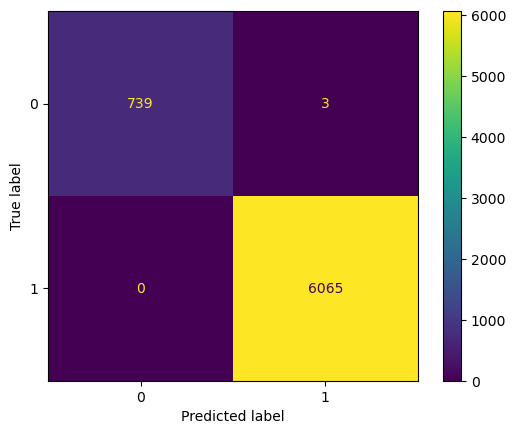

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_class, y_pred)

In [593]:
class FinalModel():
    def __init__(self, n_estimators=100, max_depth=5, random_state=42):
        self.model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
        self.randomstate = random_state
        
    def get_corr_features(self, X)->list:
        correlation_matrix = np.corrcoef(X, rowvar=False)
        correlated_features = set()
        threshold = 0.9

        for i in range(correlation_matrix.shape[0]):
            for j in range(i + 1, correlation_matrix.shape[1]):
                if abs(correlation_matrix[i, j]) > threshold:
                    correlated_features.add(j)
                    
        return list(correlated_features)
        
    def fit_scaler(self, X_train, y_train, threshold = 0.01):
        self.original_features_idx = [i for i in range(X_train.shape[1])]
        
        # Standardize
        self.Std = StandardScaler()
        self.Std.fit(X_train)
        processed = self.Std.transform(X_train)
                
        #Variance
        self.VarThr = VarianceThreshold(threshold=threshold)
        self.VarThr.fit(processed)
        processed = self.VarThr.transform(processed)
        
        #selected
        self.var_selected_idx = self.VarThr.get_feature_names_out(self.original_features_idx)
        
        #low correlated
        self.correlated_features_idx = self.get_corr_features(processed)
        processed = np.delete(processed, self.correlated_features_idx, axis=1)
        
        self.uncorrelated_features_idx = list(set(self.var_selected_idx) - set(self.correlated_features_idx))
                
        #lasso select
        self.lasso = LassoCV(random_state=self.randomstate)
        self.lasso.fit(processed, y_train)
        
        indices = np.where(self.lasso.coef_ != 0)[0].tolist()
        self.selected_features_idx = [self.uncorrelated_features_idx[i] for i in indices]
        print('selected features:', self.selected_features_idx)
        
    def transform(self, data:pd.DataFrame)->np.ndarray:
        
        processed = self.Std.transform(data)
        
        return processed[:,self.selected_features_idx]
    
    
    def y_transform_bin(self, y):
        return np.where(y >= 1, 1, y)
    
    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    
    def predict(self, X_test, binary_convert = True):
        y_pred = self.model.predict(X_test)
        if(binary_convert):
            return np.where(y_pred >= 1, 1, y_pred)
        else:
            return y_pred
    
    def score(self, y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        return accuracy, precision, recall, f1
    
    def show_confusion(self, y_true, y_pred):
        ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

In [594]:
final_model = FinalModel()

In [595]:
final_model.fit_scaler(X_train,y_train)

selected features: [0, 1, 2, 4, 6, 7, 8, 10, 11, 14, 16, 17, 25, 26, 29, 30, 34, 35, 40, 42, 43, 44, 45, 47, 65, 68, 69, 70, 71]


In [596]:
X_trn = final_model.transform(X_train)
X_tst = final_model.transform(X_test)

In [597]:
final_model.fit(X_trn, y_train)

In [598]:
y_pred = final_model.predict(X_tst, binary_convert=True)

In [599]:
y_re = final_model.y_transform_bin(y_test)

In [603]:
cnt_correct = 0
cnt_wrong = 0

In [604]:
for i, (x_test, y_true) in enumerate(zip(X_tst, y_test)):
    x_test = np.array(x_test, ndmin=2)
    y_pred = final_model.predict(x_test)
    y_re = final_model.y_transform_bin(y_true)
    if(y_pred == y_re):
        cnt_correct += 1
    else:
        cnt_wrong != 1

In [605]:
print(f'correctly classified: {cnt_correct}, worngly classified: {cnt_wrong}')

correctly classified: 6805, worngly classified: 0
